In [3]:
from pathlib import Path
import numpy as np
import json
from astropy.io import fits
from astropy.utils.misc import JsonCustomEncoder
import astropy.units as u
import cmasher as cmr
from matplotlib import pyplot as plt
import turbustat.statistics as tss
import turbustat.simulator
from turbustat.simulator import make_3dfield
#from turb_utils import make_extended
import seaborn as sns
import sys

from turbustat.statistics import PowerSpectrum

In [5]:
text_file_0 = open("path-data.txt", "r")
path_data = text_file_0.read()

In [6]:
datapath_data = Path(path_data).expanduser()

In [7]:
name = 'MUSE-Dor-H'

In [8]:
data = json.load(open(str(datapath_data) + '/' + name + "-m.json"))
sb = np.array(data["sb"])
vv = np.array(data["vv"])
ss = np.array(data["ss"])

In [9]:
## Replace spurious values in the arrays
m = ~np.isfinite(sb*vv*ss) | (sb < 0.0)

sb[m] = 0.0
vv[m] = np.nanmean(vv)
ss[m] = 0.0
sb /= sb.max()

good = (~m) & (sb > 0.001)

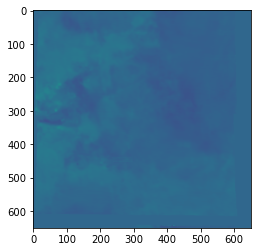

In [12]:
plt.imshow(vv)  

In [13]:
vv_hdu = fits.PrimaryHDU(vv)